In [1]:
import sklearn
import numpy as np
import gzip
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
# Cross validation will be used so test set is not always defined.
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

Xtrain, ytrain = X[:60000], y[:60000]
Xtest, ytest = X[:60000], y[:60000]

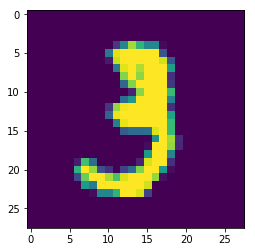

In [3]:
imageSize = 28
numImages = 70000

data = X
data = data.reshape(numImages, imageSize, imageSize, 1)

image = np.array(data[10]).squeeze()
plt.imshow(image)
plt.show()

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': [1, 5, 10]}
svc = SVC(gamma = 'scale', cache_size = 1024, max_iter = 500, shrinking = True)
clf = GridSearchCV(estimator = svc, param_grid = parameters, n_jobs = 8)
clf.fit(X, y)

/home/daniel/.conda/envs/csgrads1/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/daniel/.conda/envs/csgrads1/lib/python2.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=1024, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=500, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=8,
       param_grid={'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': [1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [5]:
for i,param in enumerate(clf.cv_results_['params']):
    print str(param) + str(': ') + str(1 - clf.cv_results_['mean_test_score'][i])

{'kernel': 'linear', 'C': 1}: 0.18772857142857147
{'kernel': 'rbf', 'C': 1}: 0.023742857142857177
{'kernel': 'poly', 'C': 1}: 0.02747142857142859
{'kernel': 'sigmoid', 'C': 1}: 0.2566142857142857
{'kernel': 'linear', 'C': 5}: 0.18772857142857147
{'kernel': 'rbf', 'C': 5}: 0.018571428571428572
{'kernel': 'poly', 'C': 5}: 0.02385714285714291
{'kernel': 'sigmoid', 'C': 5}: 0.2572
{'kernel': 'linear', 'C': 10}: 0.18772857142857147
{'kernel': 'rbf', 'C': 10}: 0.01849999999999996
{'kernel': 'poly', 'C': 10}: 0.024428571428571466
{'kernel': 'sigmoid', 'C': 10}: 0.2581285714285714


In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'activation': ['identity', 'logistic'], 
              'hidden_layer_sizes': [50, 100, 150],
              'solver': ['lbfgs', 'sgd', 'adam']}
mlp  = MLPClassifier()
clf2 = GridSearchCV(estimator = mlp, param_grid = parameters, n_jobs=8)
clf2.fit(X, y)

/home/daniel/.conda/envs/csgrads1/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=8,
       param_grid={'alpha': [1, 10], 'activation': ['identity', 'logistic'], 'solver': ['lbfgs', 'sgd', 'adam'], 'hidden_layer_sizes': [50, 100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
clf2.best_estimator_

MLPClassifier(activation='logistic', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=150, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [12]:
for i,param in enumerate(clf2.cv_results_['params']):
    if (param['alpha'] == 1):
        print str(param) + str(': ') + str(1 - clf2.cv_results_['mean_test_score'][i])

{'alpha': 1, 'activation': 'identity', 'solver': 'lbfgs', 'hidden_layer_sizes': 50}: 0.11001428571428573
{'alpha': 1, 'activation': 'identity', 'solver': 'sgd', 'hidden_layer_sizes': 50}: 0.9013857142857142
{'alpha': 1, 'activation': 'identity', 'solver': 'adam', 'hidden_layer_sizes': 50}: 0.09322857142857144
{'alpha': 1, 'activation': 'identity', 'solver': 'lbfgs', 'hidden_layer_sizes': 100}: 0.1159
{'alpha': 1, 'activation': 'identity', 'solver': 'sgd', 'hidden_layer_sizes': 100}: 0.9013857142857142
{'alpha': 1, 'activation': 'identity', 'solver': 'adam', 'hidden_layer_sizes': 100}: 0.09172857142857138
{'alpha': 1, 'activation': 'identity', 'solver': 'lbfgs', 'hidden_layer_sizes': 150}: 0.11699999999999999
{'alpha': 1, 'activation': 'identity', 'solver': 'sgd', 'hidden_layer_sizes': 150}: 0.9013857142857142
{'alpha': 1, 'activation': 'identity', 'solver': 'adam', 'hidden_layer_sizes': 150}: 0.09792857142857148
{'alpha': 1, 'activation': 'logistic', 'solver': 'lbfgs', 'hidden_layer_si

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gbc = GradientBoostingClassifier(loss='deviance',criterion='mse', verbose=1, max_depth=5, max_features = 'sqrt')
gbc.fit(Xtrain, ytrain)

gbc2 = GradientBoostingClassifier(loss='deviance',criterion='mse', verbose=1, max_depth=4, max_features = 'sqrt')
gbc2.fit(Xtrain, ytrain)

gbc3 = GradientBoostingClassifier(loss='deviance',criterion='mse', verbose=1, max_depth=3, max_features = 'sqrt')
gbc3.fit(Xtrain, ytrain)

gbc4 = GradientBoostingClassifier(loss='deviance',criterion='mse', verbose=1, max_depth=2,
                                  max_features = 'sqrt')
gbc4.fit(Xtrain, ytrain)

gbc5 = GradientBoostingClassifier(loss='deviance',criterion='mse', verbose=1, max_depth=1,
                                  max_features = 'sqrt')
gbc5.fit(Xtrain, ytrain)

      Iter       Train Loss   Remaining Time 
         1      113356.3281            1.92m
         2       97944.6355            1.85m
         3       85869.1441            1.85m
         4       77129.0787            1.82m
         5       69491.5135            1.81m
         6       63201.9173            1.78m
         7       57708.4426            1.77m
         8       53023.7948            1.76m
         9       49090.7302            1.74m
        10       45483.5991            1.73m
        20       24984.9501            1.54m
        30       16653.3883            1.34m
        40       12289.6831            1.14m
        50        9674.0922           56.87s
        60        7940.1540           45.27s
        70        6524.2215           33.79s
        80        5514.1111           22.37s
        90        4718.1250           11.12s
       100        4073.8652            0.00s
      Iter       Train Loss   Remaining Time 
         1      117577.7541            1.28m
        

GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.1,
              loss='deviance', max_depth=1, max_features='sqrt',
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, n_iter_no_change=None, presort='auto',
              random_state=None, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=1, warm_start=False)

In [9]:
gbc6 = GradientBoostingClassifier(loss='deviance',criterion='friedman_mse', verbose=1, max_depth=5,
                                  max_features = 'sqrt')
gbc6.fit(Xtrain, ytrain)

gbc7 = GradientBoostingClassifier(loss='deviance',criterion='friedman_mse', verbose=1, max_depth=4,
                                  max_features = 'sqrt')
gbc7.fit(Xtrain, ytrain)

gbc8 = GradientBoostingClassifier(loss='deviance',criterion='friedman_mse', verbose=1, max_depth=3,
                                  max_features = 'sqrt')
gbc8.fit(Xtrain, ytrain)

gbc9 = GradientBoostingClassifier(loss='deviance',criterion='friedman_mse', verbose=1, max_depth=2,
                                  max_features = 'sqrt')
gbc9.fit(Xtrain, ytrain)

gbc10 = GradientBoostingClassifier(loss='deviance',criterion='friedman_mse', verbose=1, max_depth=5,
                                  learning_rate = 0.01, max_features = 'sqrt')
gbc10.fit(Xtrain, ytrain)

      Iter       Train Loss   Remaining Time 
         1      113757.6654            1.95m
         2       98148.7608            1.92m
         3       86856.3373            1.90m
         4       77554.2726            1.88m
         5       70076.6664            1.86m
         6       63443.5502            1.84m
         7       58313.2630            1.82m
         8       53670.9498            1.80m
         9       49478.2138            1.78m
        10       45758.3282            1.76m
        20       24746.4737            1.57m
        30       16501.3014            1.37m
        40       12135.2746            1.17m
        50        9524.9027           58.35s
        60        7700.6021           46.47s
        70        6451.1502           34.51s
        80        5486.6132           22.87s
        90        4668.4608           11.37s
       100        3991.7886            0.00s
      Iter       Train Loss   Remaining Time 
         1      116822.4131            1.27m
        

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

In [10]:
print 'mse with max depth 5 error rate: ' + str(1 - gbc.score(Xtest,ytest))
print 'mse with max depth 4 error rate: ' + str(1 - gbc2.score(Xtest,ytest))
print 'mse with max depth 3 error rate: ' + str(1 - gbc3.score(Xtest,ytest))
print 'mae with max depth 2 error rate: ' + str(1 - gbc4.score(Xtest,ytest))
print 'mae with max depth 1 error rate: ' + str(1 - gbc5.score(Xtest,ytest))
print 'friedman_mse with max depth 5 error rate: ' + str(1 - gbc6.score(Xtest,ytest))
print 'friedman_mse with max depth 4 error rate: ' + str(1 - gbc7.score(Xtest,ytest))
print 'friedman_mse with max depth 3 error rate: ' + str(1 - gbc8.score(Xtest,ytest))
print 'friedman_mse with max depth 2 error rate: ' + str(1 - gbc9.score(Xtest,ytest))
print 'friedman_mse with max depth 5 and learning rate 0.01 error rate: ' + str(1 - gbc10.score(Xtest,ytest))

mse with max depth 5 error rate: 0.011349999999999971
mse with max depth 4 error rate: 0.02915000000000001
mse with max depth 3 error rate: 0.05078333333333329
mae with max depth 2 error rate: 0.08538333333333337
mae with max depth 1 error rate: 0.1471
friedman_mse with max depth 5 error rate: 0.010433333333333294
friedman_mse with max depth 4 error rate: 0.0275333333333333
friedman_mse with max depth 3 error rate: 0.05091666666666672
friedman_mse with max depth 2 error rate: 0.08520000000000005
friedman_mse with max depth 5 and learning rate 0.01 error rate: 0.07448333333333335
